<a href="https://colab.research.google.com/github/samin-batra/100daysofcode/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [47]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [48]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.shape)
print(data[data.isna()])
print(data.duplicated())
print(data.dtypes)

(5391, 6)
      Rank Release_Date Movie_Title USD_Production_Budget USD_Worldwide_Gross  \
0      NaN          NaN         NaN                   NaN                 NaN   
1      NaN          NaN         NaN                   NaN                 NaN   
2      NaN          NaN         NaN                   NaN                 NaN   
3      NaN          NaN         NaN                   NaN                 NaN   
4      NaN          NaN         NaN                   NaN                 NaN   
...    ...          ...         ...                   ...                 ...   
5386   NaN          NaN         NaN                   NaN                 NaN   
5387   NaN          NaN         NaN                   NaN                 NaN   
5388   NaN          NaN         NaN                   NaN                 NaN   
5389   NaN          NaN         NaN                   NaN                 NaN   
5390   NaN          NaN         NaN                   NaN                 NaN   

     USD_Domestic

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
# data.USD_Production_Budget = data.USD_Production_Budget.astype('str').str.replace("$","")
# data.USD_Production_Budget = data.USD_Production_Budget.astype('str').str.replace(",","")
# data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype('str').str.replace("$","")
# data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype('str').str.replace(",","")
# data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype('str').str.replace("$","")
# data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype('str').str.replace(",","")

cols = ["USD_Production_Budget","USD_Worldwide_Gross","USD_Domestic_Gross"]
chars = ["$",","]
for col in cols:
  for char in chars:
    data[col] = data[col].astype('str').str.replace(char,"")
  data[col] = pd.to_numeric(data[col])

data.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
5,4250,12/30/1925,Ben-Hur,3900000,9000000,9000000
6,4630,12/8/1927,Wings,2000000,0,0
7,5141,1/2/1929,The Broadway Melody,379000,4358000,2800000
8,4240,1/1/1930,Hell's Angels,4000000,0,0
9,5043,12/31/1931,Mata Hari,558000,900000,900000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [6]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Descriptive Statistics

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [8]:
print(data.describe())
print(data.USD_Production_Budget.max())
print(data.USD_Worldwide_Gross.max())

print(data.USD_Production_Budget.idxmax())

print(data.USD_Production_Budget.idxmin())
print(data.iloc[3529])
print(data.iloc[2427])

          Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count 5,391.00               5,391.00             5,391.00            5,391.00
mean  2,696.00          31,113,737.58        88,855,421.96       41,235,519.44
std   1,556.39          40,523,796.88       168,457,757.00       66,029,346.27
min       1.00               1,100.00                 0.00                0.00
25%   1,348.50           5,000,000.00         3,865,206.00        1,330,901.50
50%   2,696.00          17,000,000.00        27,450,453.00       17,192,205.00
75%   4,043.50          40,000,000.00        96,454,455.00       52,343,687.00
max   5,391.00         425,000,000.00     2,783,918,982.00      936,662,225.00
425000000
2783918982
3529
2427
Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross               

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [9]:
data[data.USD_Domestic_Gross==0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [10]:
data_zero_revenue = data[data.USD_Worldwide_Gross==0]
data_zero_revenue.sort_values('USD_Production_Budget',ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [11]:
data.query('USD_Worldwide_Gross==0 & USD_Domestic_Gross!=0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [12]:
data_filtered = data.query('USD_Worldwide_Gross!=0 and USD_Domestic_Gross==0')
data_filtered.value_counts()

Rank  Release_Date  Movie_Title                         USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
556   2015-12-31    Don Gato, el inicio de la pandilla  80000000               4547660              0                     1
4310  1956-02-16    Carousel                            3380000                3220                 0                     1
4149  2014-06-06    Anna                                4357373                1200000              0                     1
4158  2011-10-21    Cargo                               4200000                313230               0                     1
4234  2013-12-31    Geograf globus propil               4000000                4454853              0                     1
                                                                                                                         ..
2947  2015-01-09    Broken Horses                       15000000               3471                 0                     1
2955  2015-05

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [13]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [14]:
data_clean = data[data.Release_Date<scrape_date]

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [15]:
data_clean.describe()
data_loss = data_clean.loc[data_clean.USD_Production_Budget>data_clean.USD_Worldwide_Gross]

In [16]:
len(data_loss)/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

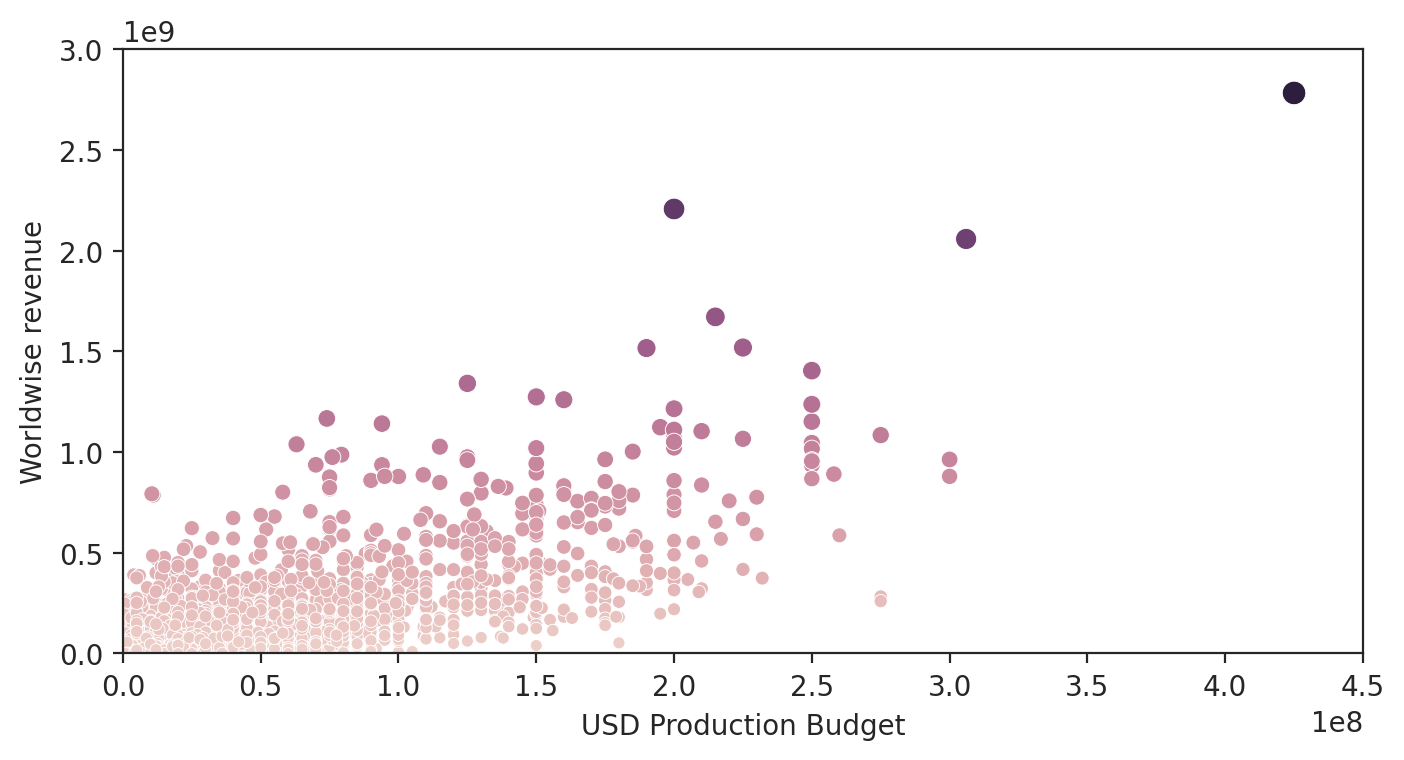

In [17]:
plt.figure(figsize = (8,4),dpi = 200)
with sns.axes_style("ticks"):
  ax = sns.scatterplot(data=data_clean,
                  x='USD_Production_Budget', 
                  y='USD_Worldwide_Gross',
                  hue = "USD_Worldwide_Gross",
                  size = "USD_Worldwide_Gross",
                  legend=False)
  ax.set(xlim = (0,450000000),
        ylim = (0,3000000000),
        xlabel = "USD Production Budget",
        ylabel="Worldwise revenue")
plt.show()
# plt.legend(loc = "upper left")

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



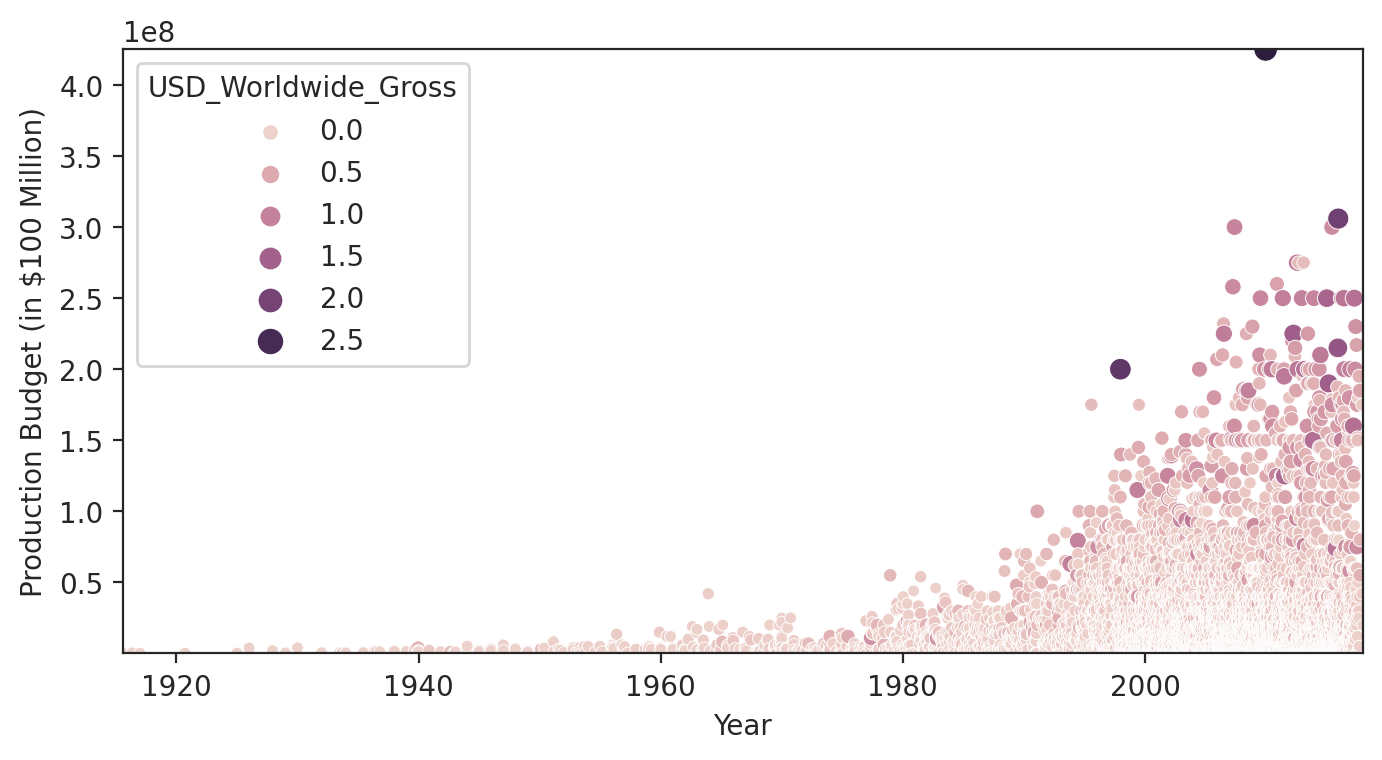

In [18]:
plt.figure(figsize = (8,4),dpi = 200)
with sns.axes_style("ticks"):
  ax = sns.scatterplot(data=data_clean,
                  x='Release_Date', 
                  y='USD_Production_Budget',
                  hue = "USD_Worldwide_Gross",
                  size = "USD_Worldwide_Gross",
                  legend=True)
  ax.set(xlim = (data_clean.Release_Date.min(),data_clean.Release_Date.max()),
        ylim = (data_clean.USD_Production_Budget.min(),data_clean.USD_Production_Budget.max()),
        xlabel = "Year",
        ylabel="Production Budget (in $100 Million)")
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [32]:
date_index =  pd.DatetimeIndex(data = data_clean.Release_Date)
print(date_index)
print(date_index.year)
year = date_index.year
print((date_index.year//10)*10)
decade = (date_index.year//10) * 10
data_clean['Decade'] = decade

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)
Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)
Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
data_clean.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [36]:
old_films = data_clean[data_clean.Decade<1970]
new_films = data_clean[data_clean.Decade>=1970]
print(len(old_films))
print(len(new_films))
old_films.describe()

153
5231


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


# Seaborn Regression Plots

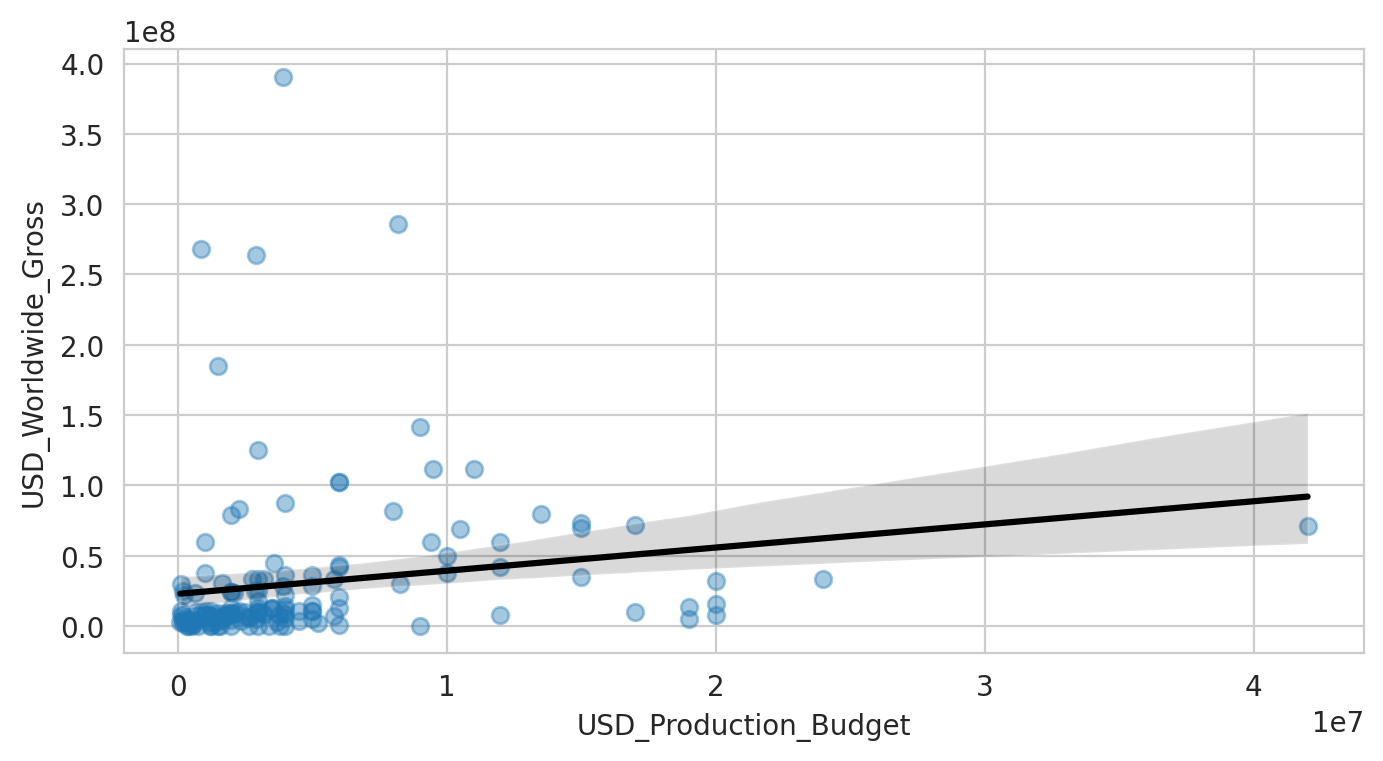

In [38]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

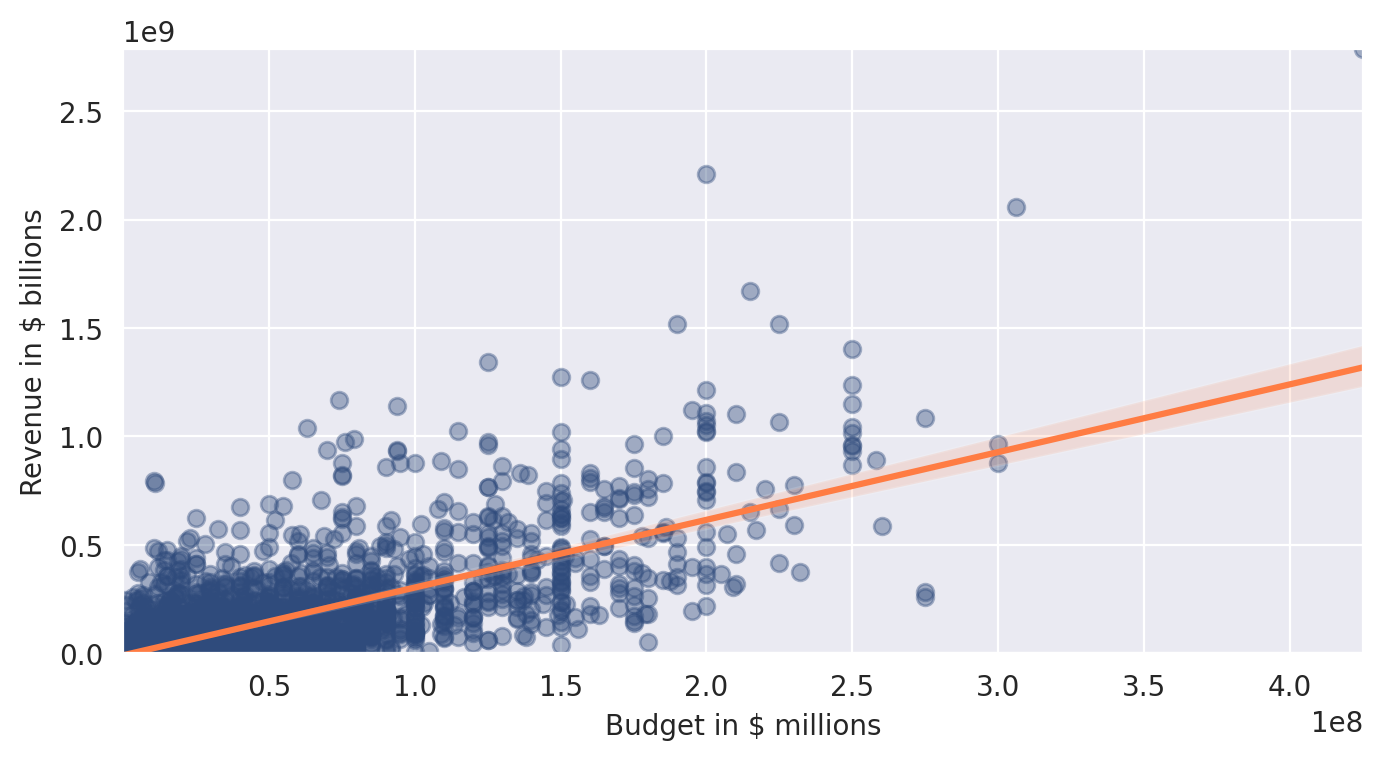

In [45]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4, 'color':'#2f4b7c'},
            line_kws = {'color': '#ff7c43'})
  ax.set(ylabel="Revenue in $ billions",xlabel="Budget in $ millions",
         xlim = (new_films.USD_Production_Budget.min(),new_films.USD_Production_Budget.max()),
         ylim = (new_films.USD_Worldwide_Gross.min(),new_films.USD_Worldwide_Gross.max()))
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [49]:
regression = LinearRegression()

In [53]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)
regression.score(X, y)


[-8650768.00661027]
[[3.12259592]]


0.5577032617720403

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [54]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)
regression.score(X, y)

[22821538.63508039]
[[1.64771314]]


0.02937258620576877